# Alzheimer's Disease Prediction

Alzheimer's disease is a disorder that affects the cognitive functions, memory, and behavior of an individual and is known to be a progressive neurodegenerative condition. To improve patient outcomes, it is essential to detect Alzheimer's disease early and intervene in a timely manner. Machine learning models have the potential to predict the likelihood of Alzheimer's disease based on relevant features and can play a significant role in early detection.

# Goal

The main goal of this project is to create a predictive model that can effectively classify individuals into various groups based on features associated with Alzheimer's disease. The target variable, 'Group', signifies the diagnostic status of individuals and can be categorized into three different values: Demented, Nondemented, and Converted. By analyzing features like age, gender, education, cognitive assessments, and brain metrics, the model aims to detect patterns that indicate the presence of Alzheimer's disease.

# Dataset Details

Source: https://www.kaggle.com/datasets/brsdincer/alzheimer-features

The dataset contains information on 373 individuals and includes the following columns:

**Group**: Target variable indicating the diagnostic group (Demented, Nondemented, Converted).

**M/F**: Gender of the individuals (Male/Female).

**Age**: Age of the individuals.

**EDUC**: Years of education.

**SES**: Socioeconomic Status, ranging from 1 (Low) to 5 (High).

**MMSE**: Mini Mental State Examination.

**CDR**: Clinical Dementia Rating.

**eTIV**: Estimated total intracranial volume - The estimation of the total space available inside the skull that can potentially house the brain.

**nWBV**: Normalized Whole Brain Volume - It says about how much space of the available space inside the skull does the brain actually occupy.

**ASF**: Atlas Scaling Factor.

The dataset comprises categorical nominal, discrete, and continuous variables, providing a diverse set of features for analysis.

# Methodology

The project involves steps like,

1. Data Preprocessing: Understand the characteristics of dataset, handle missing values, and preprocess the data for training the model
2. Exploratory Data Analysis (EDA) : EDA is the method of analysing the dataset for finding correlation between variables, Analyze the distribution, and also plot visualizations for better understanding the data.
3. Model Development: Model development involves using Machine Learning algorithms, particularly classification algorithms to predict the 'Group' Variable.
4. Model Evaluation: After trainining the model, we need to evaluate its performance on real world unseen data, and select the best performing model from that.
5. Insights: Gain insights about the dataset and model predictions.


# Implementation



In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/alzheimer.csv')

In [164]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


# Renaming columns for making it more recognizable

In [165]:
#df = df.rename(columns = {'EDUC':"Education", "SES":"Socioeconomic status", "MMSE":"Mini-Mental State Examination Score", "CDR":"Clinical Dementia Rating", "eTIV":"Estimated Total Intracranial Volume", "nWBV":"Normalized Whole Brain Volume", "ASF":"Atlas Scaling Factor"})

In [166]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


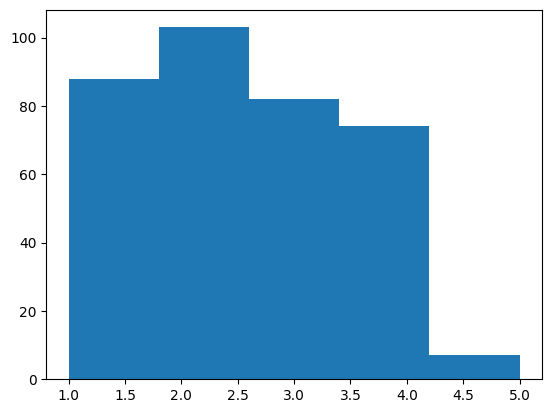

In [167]:
plt.hist(df['SES'], bins = 5)
plt.show()

In [168]:
# mean = df['SES'].mean()
# df['SES'].fillna(mean, inplace=True)

In [169]:
# df.isna().any()

In [170]:
# mean_score = df['MMSE'].mean()
# df['MMSE'].fillna(mean_score, inplace=True)

In [171]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [172]:
#df.isnull().sum()

# Checking outliers using Box-Plots

Box-plots are great way to detect outliers in the data distribution. It plots the interquartile range of the overall dataset where the 50% of value is marked as a block on the center and the range is determined by whiskers. If any value that is deviated from the whiskers considered as outliers.

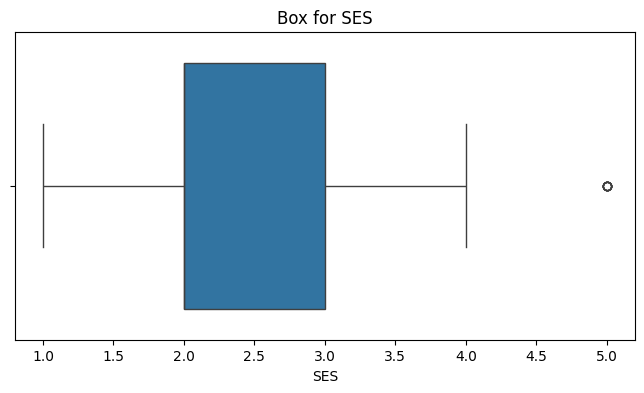

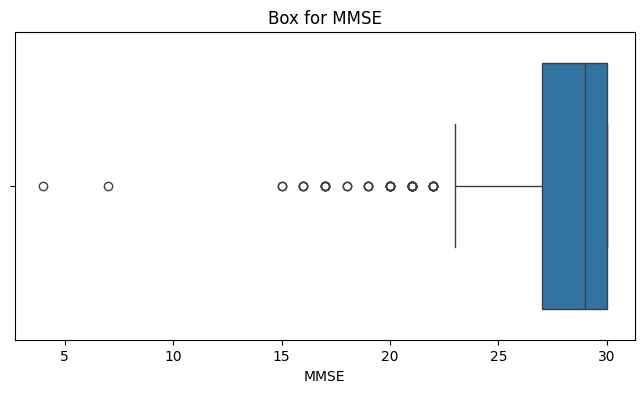

In [173]:
# Checking Outliers using box-plots

def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df[column_name])
    plt.title(f"Box for {column_name}")
    plt.show()


column_of_interest = ["SES", "MMSE"]

for col in column_of_interest:
    check_outliers(df, col)

In here, the boxplot of Socioeconomic status says that most of the values are in the range between 2 and 3, and there are outliers on reaching close to 5.

In case of boxplot on Mini-Mental State Examination Score, 50 % of the value in in between greater than 25 and 30. The outliers can be seen on the left deviated froom whiskers.

# Quantile-Quantile plot

Qunatile is something that splits the dataset into equal number of parts, When this happens Each Quantile can be similar to the another quantile in the entire dataset

Q-Q plot is often used for determining if a specific dataset follows a particular probability distribution or not, mostly it is used for checking is a dataset is following a normal distribution

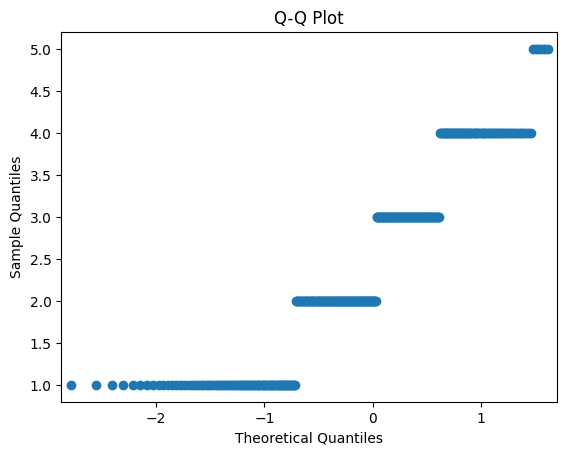

In [174]:
import statsmodels.api as sm

def check_normal(df, column_name):
    sm.qqplot(df[column_name])
    plt.title("Q-Q Plot")
    plt.show()

check_normal(df, "SES")

# Univariate analysis

Univariate analysis involves the analysis of a single variable. It is often defines as analyzing and understanding the distribution, central tendency of a single variable from the dataset. It focuses on analysing the variables in isolation one by one

In [175]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


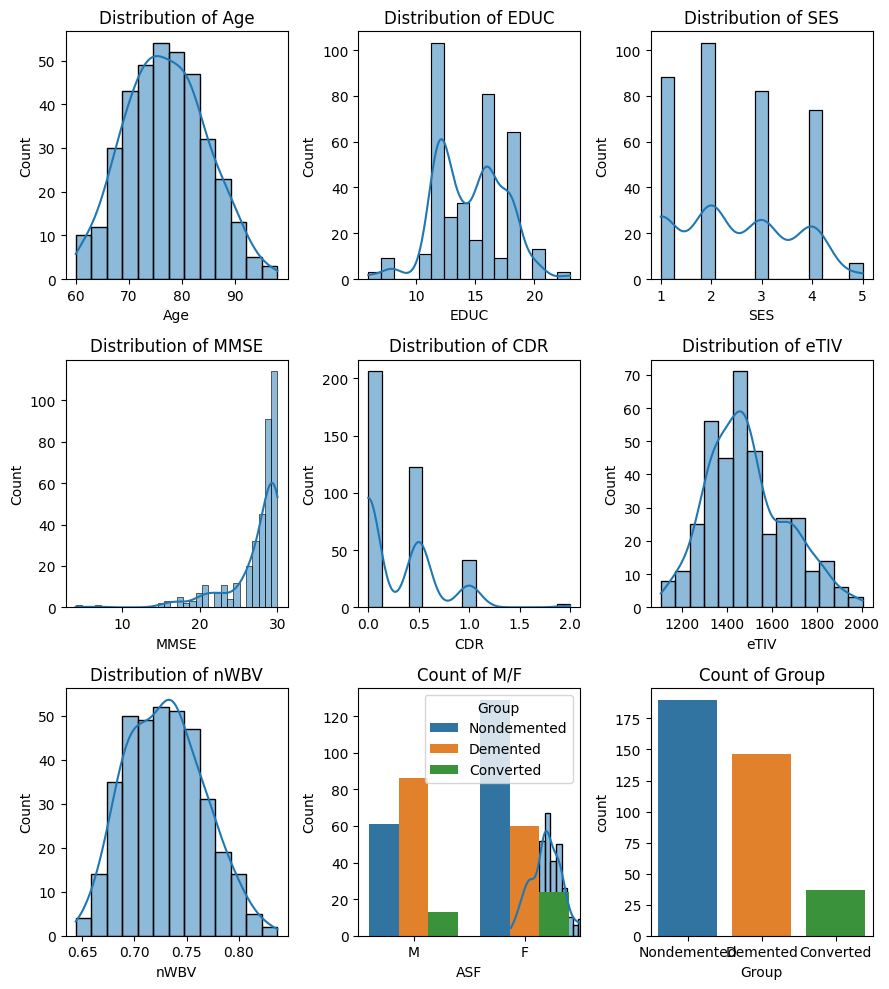

In [176]:
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

plt.figure(figsize = (9, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

categorical_features = ['M/F', 'Group']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)
    sns.countplot(data = df, x = feature, hue = 'Group')
    plt.title(f"Count of {feature}")

plt.tight_layout()
plt.show()

# Univariate Analysis Summary

1. **Age**

*   Age follows approximately a normal distribution

2. **EDUC (Education)**

*  The distribution concentrated mostly on three bars 100, 80, and 60

3. **SES (Socioeconomic Status)**

*  The distribution is mostly concentated on 2 which means the mode will be 2. Most of the people has a socioeconomic status of 2 at an average of 2.4 in the entire distribution

4. **MMSE (Mini Mental State Examination)**

* The distribution tends to be more concenrated to the right, larger values

5. **CDR (Clinical Dementia Rating)**

* CDR concentrated mostly to the left

6. **eTIV (Estimated Total Intracranial Volume)**

* Approximately follows a normal distribution but more deviation to the left

7. **mWBV (Normalized Whole Brain Volume)**

* Follows approximate normal distribution

8. M/F (Male / Female)

* Non-Demented - Females are mostly non-demented as the distribution says
* Demented - Males are more demented when compared to females
* Convertes - Females are more converted than males

9. Group Counts

* Converted people are less than demented
* Demented people are less than Non-Demented
* Most of the people are non-demented





# Bivariate Analysis

Bivariate analysis includes the simultanious analysis of two variables like finding their relation, difference, and how one affect the other. It uses methods like Correlation, Covariance, Scatter Plots, etc to find the relationship between two variables




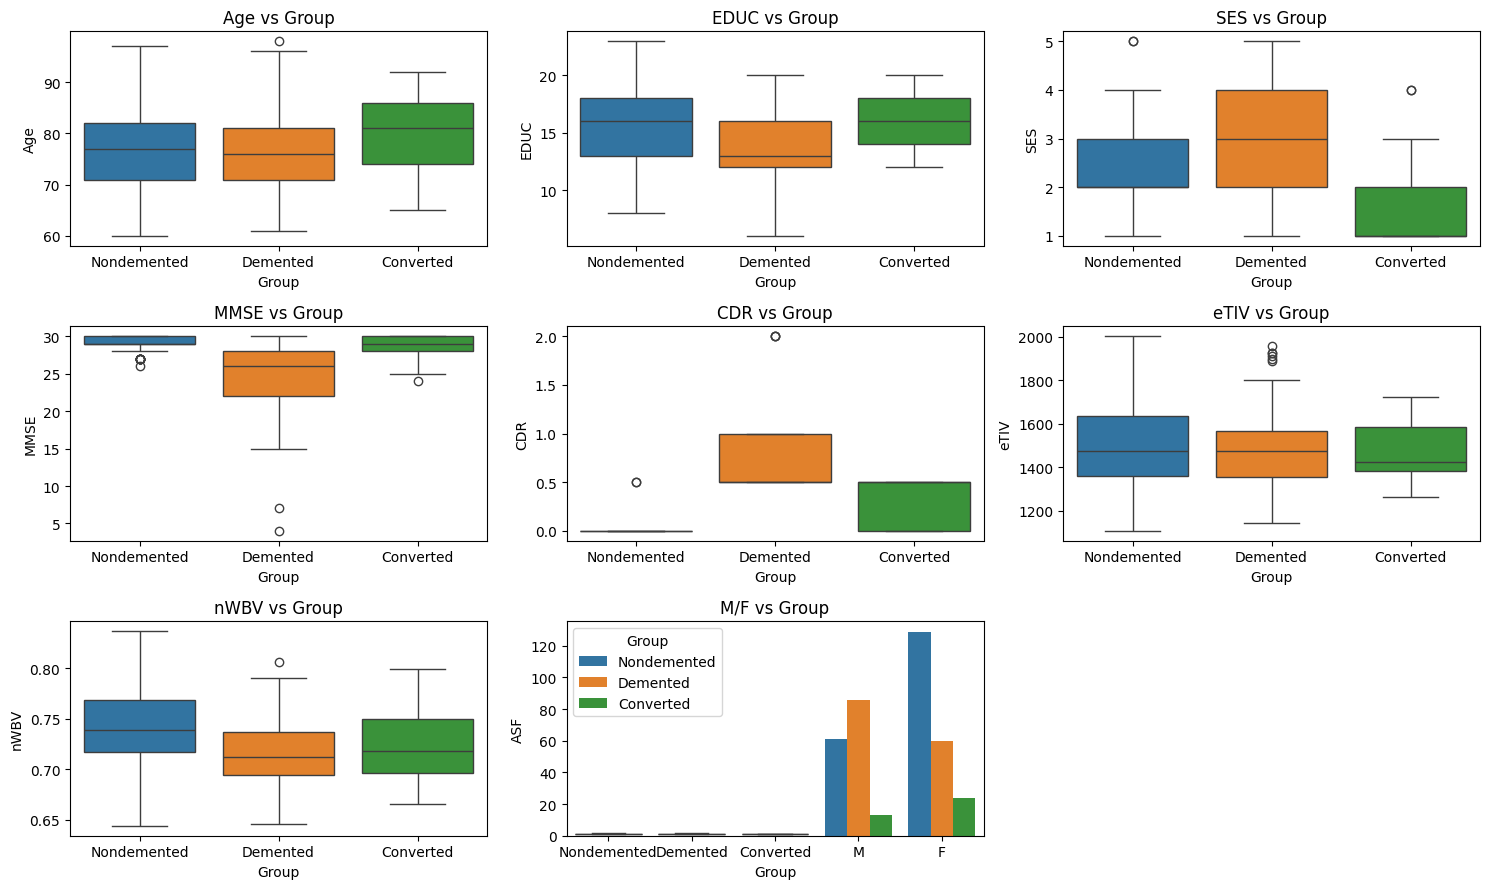

In [177]:
plt.figure(figsize=(15, 9))

numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = df, x = 'Group', y = feature, hue='Group')
    plt.title(f"{feature} vs Group")

categorical_features = ['M/F']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)
    sns.countplot(x = feature, hue='Group', data = df)
    plt.title(f"{feature} vs Group")

plt.tight_layout()
plt.show()


# Bivariate analysis Results

1. Age vs Group

* The graph show that Age of Non-demented and demented people are middled around 75. Which means the median is 75. The Converted on the other hand is middled around 80.

2. EDUC (Education) vs Group

* From the graph, we can see that the people who are Non-demented have a better education score than people who are demented. In convertion case, it it standing similar to non-demented people means they also tend to have better education but genetical effect cause them the disease.

3. SES (Socioeconomic Status) vs Group

* Socioeconomic status are better for individual who are demented and lower for those who are non-demented. This seems counterintutive, It signifies that there is a higher kind of complex relationship exists between these two variables.

4. MMSE (Mini-Mental State Exam) vs Group

* The MMSE scores are lower for Demented people which means, there is a conginitive impairment for those individuals than Non-demented and converted.

5. CDR (Clinical Dementia Rating) vs Group

* CDR (Clicinical Dementia Rating) is higher in Demented people signifies a direct correlation, than of Non-demented and Converted

6. eTIV (Estimated Total Intracranial Volume) vs Group

* eTIV doesn't show much variation between three individual groups

7. nWBV (Normalized Whole Brain Volume)

* nWBV is lower for Demented people which tells that the people who are affected by dementia of alzheimers are more likely to have reduction in brain volume than Non-demented and converted, but another thing to note is that the converted has slightly a little volume decrease than the Non-demented.

8. M/F (Male / Female) vs Group

* In case of Demented Men tend to be affected by the disease more than women and women tend to be Non-demented more than Men

# Multivariate Analysis

Multivairate analysis take into account multiple variables at the same time for analyzing variables simultaniously

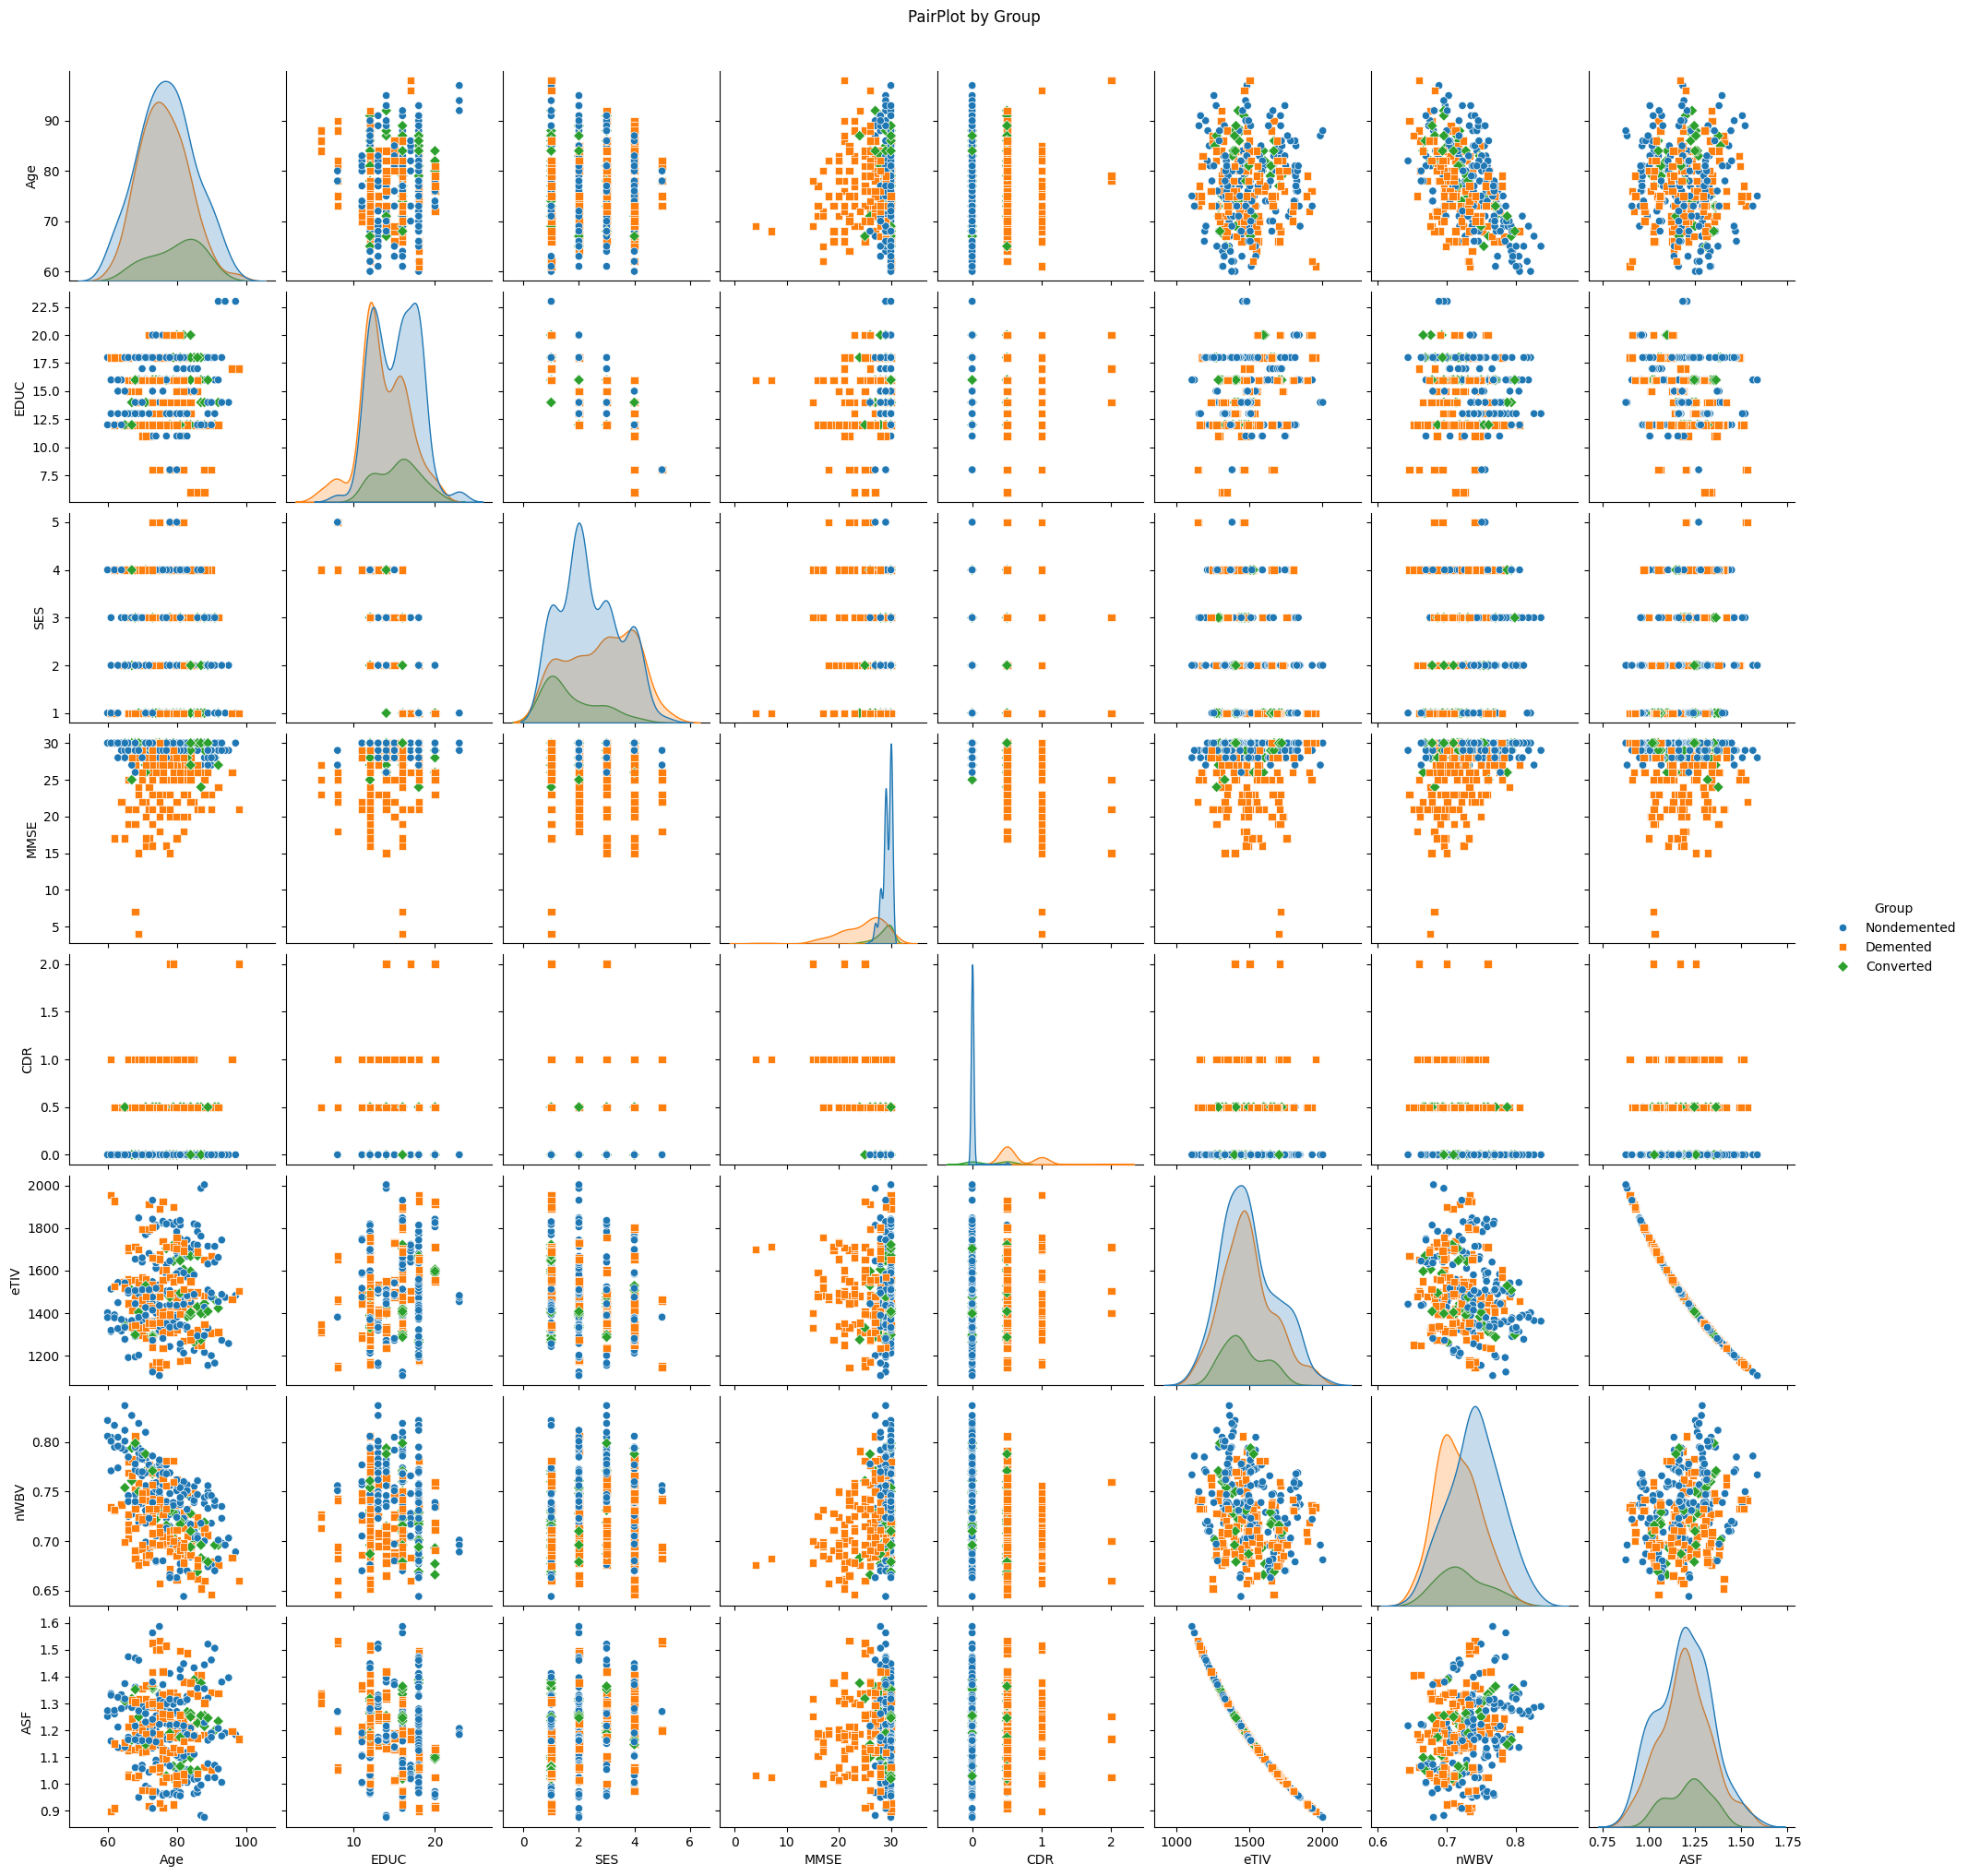

In [178]:
selected_features =  ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F', 'Group']

sns.pairplot(df[selected_features], hue='Group', markers = ['o', 's', 'D'], diag_kind='kde', height = 2.5)
plt.suptitle("PairPlot by Group", y = 1.02)
plt.show()

# Correlation Matrix

Correlation metrics can be used for finding the relation between two variables and also helps to determine how strong the relations are

* If the result of correlation between 2 variables is postive, it means there is a postive realtion and if one variable increases, the other increases as well

* If the result of the correlation between 2 variables are negative, it means there is a negative relation and if one variable increase, the other tend to decrease.

* If the result revolves around zero, it means there is a weak correlation of there is not correlation at all.

In [179]:
corr_matrix = df[ ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']].corr()
corr_matrix

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Age,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


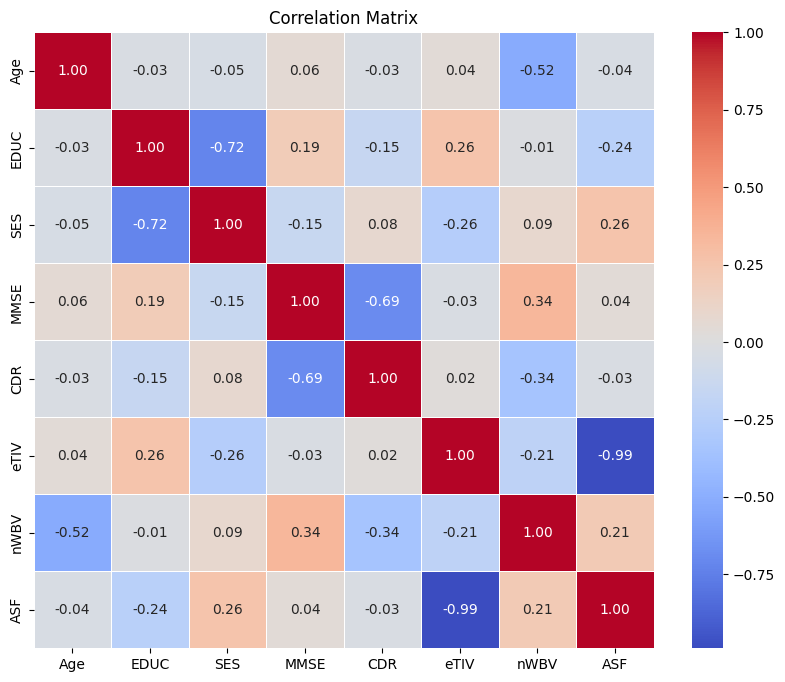

In [180]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [181]:
np.fill_diagonal(corr_matrix.values, np.nan)

print("Maximum Correlation:", corr_matrix.max().max())
print("Minimum Correlation:", corr_matrix.min().min())

Maximum Correlation: 0.3419124100551544
Minimum Correlation: -0.9888765232836364


# Summary of Correlation-Matrix

1. From the correlation matrix, we can see that the highest correlation is 0.34 which means there is a postive correlation between MMSE and nWBV. This means those people who has higher nMBV has better scores on MMSE.

2. There is also a higher negative correlation between ASF (Atlas Scaling Factor) and eTIV. Which signifies that when one increases the other decreases. The individuals with smaller eTIV (smaller skulls) may experience brain shrinkage leading to larger ASF values.

# Data Cleaning

Data Cleaning is the method of removing outliers, NaN values, and noises from data using statisitical techniques.

1. **Handling Missing Values**

* To handle missing values, there are many methods, here we can use the imputation using mean. This means we find the average of data points of the variable and then insert the mean value to the Missing places.

In [182]:
df.isna().any()

Group    False
M/F      False
Age      False
EDUC     False
SES       True
MMSE      True
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

In [183]:
ses_mean = df['SES'].mean()
df['SES'].fillna(ses_mean, inplace=True)

mmse_mean = df['MMSE'].mean()
df['MMSE'].fillna(mmse_mean, inplace=True)

In [184]:
df.isna().any()

Group    False
M/F      False
Age      False
EDUC     False
SES      False
MMSE     False
CDR      False
eTIV     False
nWBV     False
ASF      False
dtype: bool

# Handling Outliers

Various methods are there for outlier handling, like Removal, Truncation, Imputation, etc. Here we can use IQR (Inter Quartile Range) technique to remove the outliers. Here is how it works

Inter Quartile Range can find hwere does the 50% of the data lies from the whole distribution. It also gives the range in which the overall data is distributed, If any points that is far deviated from this range is considered as an outlier and those are removed from the dataset.

In [185]:
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for feature in numeric_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.000000,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


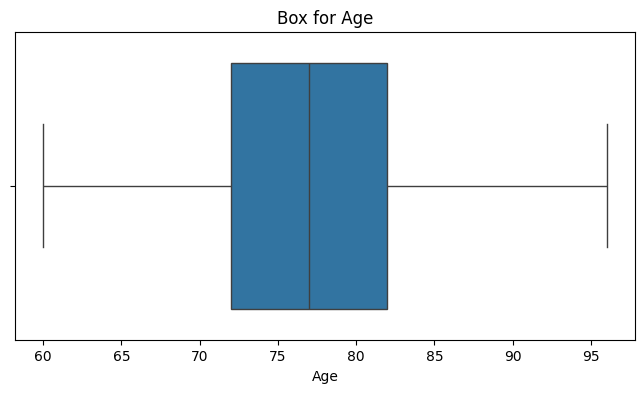

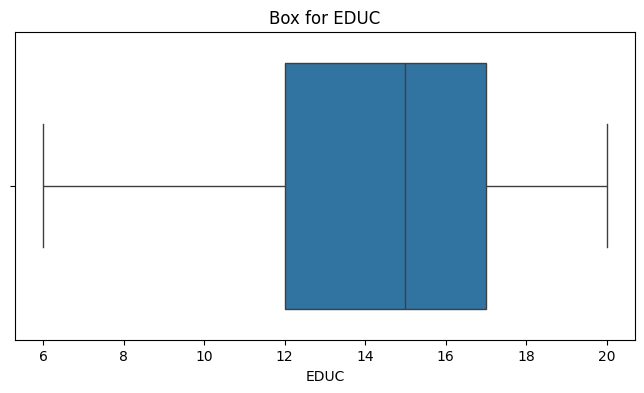

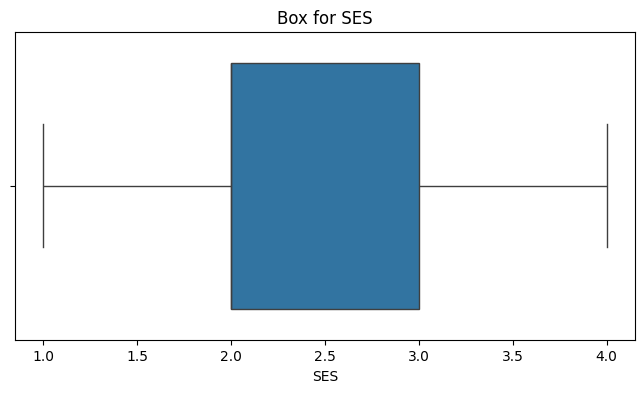

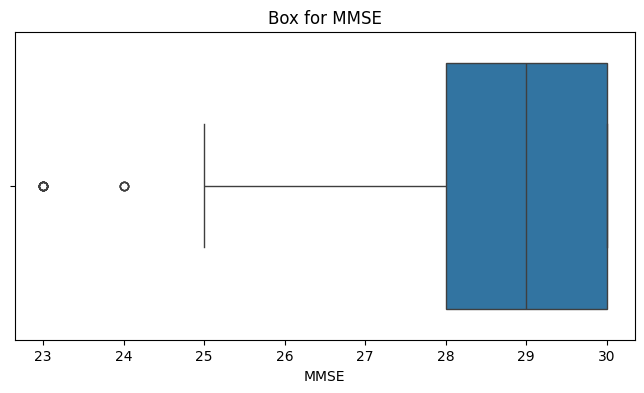

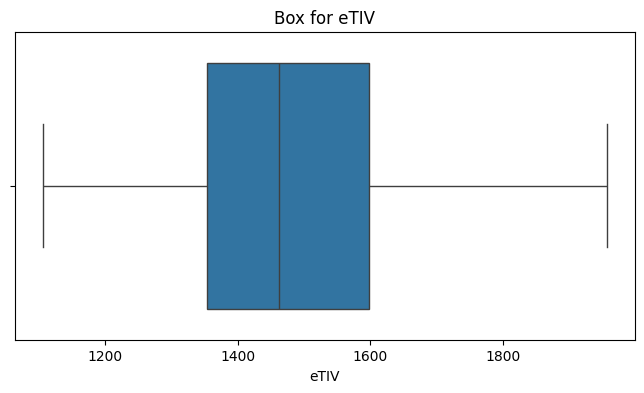

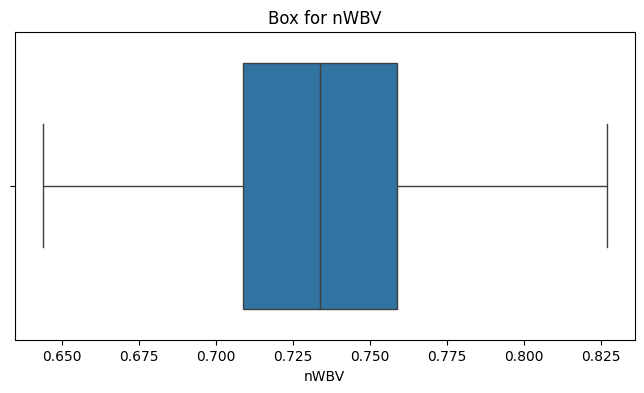

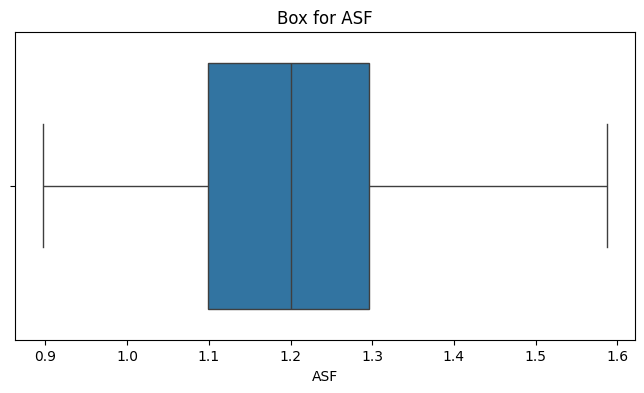

In [186]:
for i, feature in enumerate(numeric_features):
    check_outliers(df, feature)

In [187]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Group'] = label_encoder.fit_transform(df['Group'])

In [188]:
df = pd.get_dummies(df, columns=['M/F'], drop_first = True)

In [189]:
df

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,1
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010,1
5,2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0
6,2,90,18,3.000000,27.0,0.0,1200,0.718,1.462,0
7,2,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1
...,...,...,...,...,...,...,...,...,...,...
368,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037,1
369,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040,1
370,2,61,13,2.000000,30.0,0.0,1319,0.801,1.331,0
371,2,63,13,2.000000,30.0,0.0,1327,0.796,1.323,0


# Handling Duplicate Values



In [190]:
def detect_duplicates(df):
    duplicated_rows = df[df.duplicated()]
    return duplicated_rows

detect_duplicates(df)

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M


# Feature Engineering

Feature engineering is the process of creating new features or modifying existing one in a datasdt to improve the performance of a machine learning model. This methods can enchance the dataset and also can improve the model preformance. It includes

1. Feature Selection - Selecting most relevant features
2. Feature Transformation - Modifying the current features to imporve it
3. Creating new features - Involves creating new features using the existing ones
4. Bining and Discretization - Grouping Continious variable into bins or categories to simply the complex relationships
5. Normalization and standardization



### 1. Age Categories

We can bin Age variable into categories such as Young, Middle-Aged, and Elderly to capture more non-linear relationships

In [191]:
bins = [0, 60, 75, 100]
labels = ['Young', 'Middle-Aged', 'Elderly']
df['Age_Category'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

df = pd.get_dummies(df, columns = ['Age_Category'], drop_first = True)

###Brain Volume Ratio

Brain Volume Ratio = $ nWBV / eTIV $

In [192]:
df['Whole_Brain_Volume'] = df['nWBV'] / df['eTIV']

In [193]:
df

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Age_Category_Middle-Aged,Age_Category_Elderly,Whole_Brain_Volume
2,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,1,0,1,0.000439
3,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010,1,0,1,0.000410
5,2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,0,0,1,0.000584
6,2,90,18,3.000000,27.0,0.0,1200,0.718,1.462,0,0,1,0.000598
7,2,80,12,4.000000,28.0,0.0,1689,0.712,1.039,1,0,1,0.000422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037,1,0,1,0.000410
369,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040,1,0,1,0.000400
370,2,61,13,2.000000,30.0,0.0,1319,0.801,1.331,0,1,0,0.000607
371,2,63,13,2.000000,30.0,0.0,1327,0.796,1.323,0,1,0,0.000600


### SES x *EDUC*

Combining Socioeconomic status and Education to get the overall status of the individual.



In [194]:
df['SES_EDUC_interaction'] = df['SES'] * df['EDUC']

### Age x MMSE

We can create an interaction between Age and MMSE to get age related effects on cognitive performance, adults will always tend to perform well in cognitive performance than childern and old aged.

In [195]:
df['Age_MMSE_interaction'] = df['Age'] * df['MMSE']

In [196]:
df.sample(5)

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Age_Category_Middle-Aged,Age_Category_Elderly,Whole_Brain_Volume,SES_EDUC_interaction,Age_MMSE_interaction
170,2,92,16,1.0,30.0,0.0,1662,0.682,1.056,1,0,1,0.000410,16.0,2760.0
324,2,77,16,1.0,29.0,0.0,1818,0.734,0.965,1,0,1,0.000404,16.0,2233.0
294,2,93,18,2.0,29.0,0.0,1744,0.723,1.006,0,0,1,0.000415,36.0,2697.0
199,2,72,18,1.0,29.0,0.0,1785,0.687,0.983,1,1,0,0.000385,18.0,2088.0
210,2,80,11,4.0,30.0,0.0,1586,0.757,1.107,0,0,1,0.000477,44.0,2400.0


# Data Preparation for the Model

1.  **Splitting**: It involves dividing the entire dataset into training and testing data. The training data is used for training the model and testing data is used for checking how the model is performing in the real world unseen data
2. **Scaling**: Machine Learning models will always benifit from scaling which simply helps to reduce the overall distance of datapoints if they are far apart of increase the distance if they are reall close to each other.
3.**Oversampling**: Oversampling is used for handling class imbalance. It occurs when one class is more superior over the other, or one class has significantly fewer values than the rest. The technique is to generate sythetic samples to the minority classes
4. **Handling Multicolinearity**: Multicolinearity occurs when two or more features in the dataset has a higher postive or negative correlation. This can really affect the models performance since we are assuming that all the independent variables are not related to each other but only related to the dependent variable.
In the dataset, there is a high negative correlation between eTIV and ASF (-0.99). We can use PCA (Principle Compound Analysis) to reduce the dimensionality.



In [197]:
# Splitting the dataset

X = df.drop('Group', axis = 1)
y = df['Group']

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [199]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversampler = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
X_train_pca = pca.fit_transform(X_train_oversampled)
X_test_pca = pca.transform(X_test_scaled)

# Training & Comparing Models

We training and comparing models like Logistic Regression, SVM, KNearest Neighbors, Random Forest, etc. To find the best performing model, we can use the GridSearch.



In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
log_reg_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = GridSearchCV(LogisticRegression(max_iter = 1000), log_reg_params, cv = 5)
log_reg.fit(X_train_pca, y_train_oversampled)


# Random Forest
rf_params = {'n_estimators':[50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]}
rf = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5)
rf.fit(X_train_pca, y_train_oversampled)

# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm.fit(X_train_pca, y_train_oversampled)

# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn.fit(X_train_pca, y_train_oversampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']})

# Model Evaluation

Now we can evaluate the performance of each model on the real world unseen dataset


In [227]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Best Model: {best_model.best_estimator_}")
    print(f"Best Parameters: {best_model.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", class_report)
    print("\n")


In [228]:
evaluate(log_reg, X_test_pca, y_test)
evaluate(rf, X_test_pca, y_test)
evaluate(svm, X_test_pca, y_test)
evaluate(knn, X_test_pca, y_test)

Best Model: LogisticRegression(C=10, max_iter=1000)
Best Parameters: {'C': 10}
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.74      1.00      0.85        20
           2       1.00      0.76      0.86        37

    accuracy                           0.78        64
   macro avg       0.65      0.68      0.65        64
weighted avg       0.83      0.78      0.79        64



Best Model: RandomForestClassifier(max_depth=10)
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.90      0.88        20
           2       0.93      1.00      0.96        37

    accuracy                           0.89        64
   macro avg       0.82      0.73   

# Evaluation Result

After the evaluation of different models, RandomForest Classifer is the best performing model with a 89% accuracy. Followed by KNearest with 86%, and SVM with 84% accuracy. Logistic Regression performance is less compared to other models with a 78% accuracy.